In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.stats
import networkx as nx

In [2]:
# %pip install networkx

In [4]:
with open('simulation_results/initial/sim_exp_test.pkl','rb') as file:
    data = pickle.load(file)

In [5]:
font = {'family' : 'Helvetica Neue',
        'weight' : 'normal',
        'size'   : 15}

plt.rc('font', **font)

V = data['freq_timeseries'].shape[0]
Q = data['freq_timeseries'].shape[1]

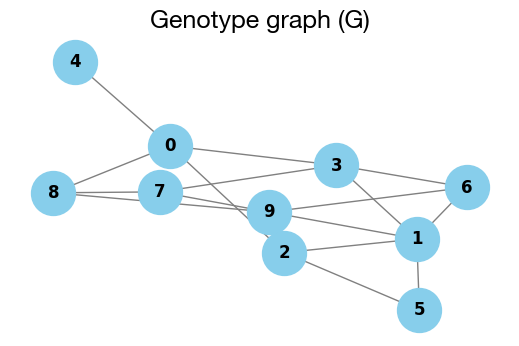

In [6]:
# show the genotype graph 

G = nx.from_numpy_array(data['A'])
node_labels = {i: f'{i}' for i in range(len(data['A']))}

plt.figure(figsize=(5, 3))
pos = nx.spring_layout(G) 
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=1000, node_color='skyblue', font_size=12, font_weight='bold', edge_color='gray')
plt.title('Genotype graph (G)')
plt.show()

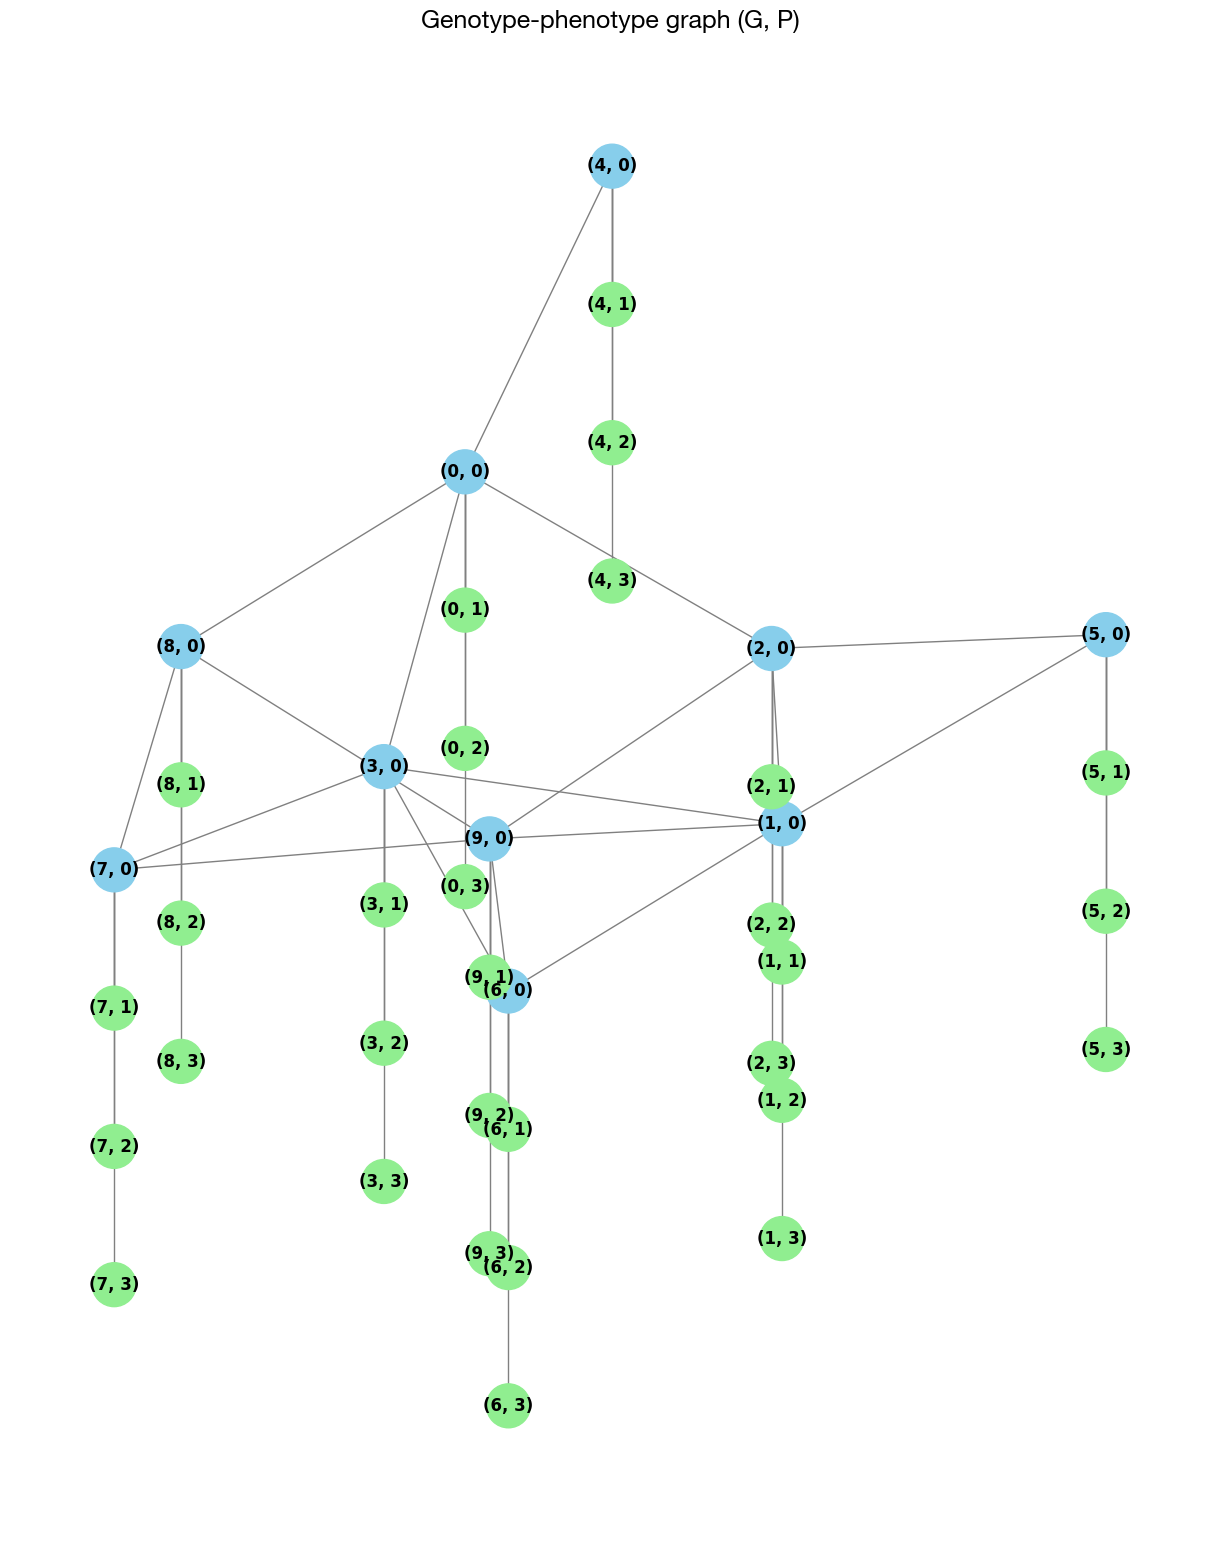

In [23]:
# show the genotype-phenotype graph 

G = nx.from_numpy_array(data['A'])
node_labels = {i: f'({i}, 0)' for i in range(len(data['A']))}

new_nodes = []
new_edges = []

# add phenotype nodes dynamically to each genotype node in the graph
new_node_start_index = len(G.nodes)

for node in G.nodes:
    for i in range(Q-1):  
        new_node = new_node_start_index + node * (Q-1) + i
        new_nodes.append(new_node)  # collect new node
        new_edges.append((node, new_node))  # collect edge between parent and child

G.add_nodes_from(new_nodes)  
G.add_edges_from(new_edges)  

parent_genotypes = [i for i in range(V) for _ in range(Q - 1)]
child_phenotypes = [i for _ in range(V) for i in range(1, Q)]

# labels for phenotype nodes
for child in range(len(new_nodes)):
    child_node = new_nodes[child]
    genotype_parent = parent_genotypes[child]
    child_number = child_phenotypes[child]
    node_labels[child_node] = '(' + str(genotype_parent) + ', ' + str(child_number) + ')'

# colors 
node_colors = []
for node in G.nodes:
    if node < len(data['A']):  
        node_colors.append('skyblue')
    else:  
        node_colors.append('lightgreen')

# positioning the nodes
pos = nx.spring_layout(G, seed=42)

# offset the children below their parent nodes
child_pos_offset = 0.20 
for node in range(len(data['A'])):
    children = [n for n in G.neighbors(node)]  
    child_count = 0
    for child in children:
        if child >= len(data['A']): 
            pos[child] = (pos[node][0], pos[node][1] - child_pos_offset * (child_count + 1))
            child_count += 1

plt.figure(figsize=(12, 15))
nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=1000, node_color=node_colors, font_size=12, font_weight='bold', edge_color='gray')

plt.title("Genotype-phenotype graph (G, P)")
plt.show()

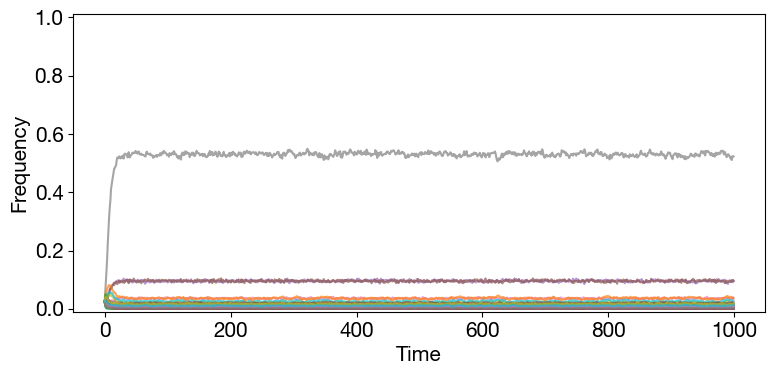

In [22]:
plt.figure(figsize=(8, 4))

# loop through each (genotype, phenotype) pair
for i in range(V):  # genotypes 
    for j in range(Q):  # phenotypes 
        plt.plot(data['freq_timeseries'][i, j, :], label=f'G: {i}, P: {j}', alpha=0.7)

plt.xlabel('Time')
plt.ylabel('Frequency')
plt.ylim(-0.01,1.01)

# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

In [12]:
# compute mean statistics

mean_freq = np.mean(data['freq_timeseries'], axis=2)

for i in range(V):  # genotypes
    for j in range(Q):  # phenotypes
        print(f'G: {i}, P: {j} - Mean frequency: {mean_freq[i, j]}')

G: 0, P: 0 - Mean frequency: 0.0008644000000000001
G: 0, P: 1 - Mean frequency: 0.0021294
G: 0, P: 2 - Mean frequency: 0.0016315
G: 0, P: 3 - Mean frequency: 0.0013550999999999997
G: 1, P: 0 - Mean frequency: 0.09468430000000001
G: 1, P: 1 - Mean frequency: 0.0948262
G: 1, P: 2 - Mean frequency: 0.035406
G: 1, P: 3 - Mean frequency: 0.5264067
G: 2, P: 0 - Mean frequency: 0.0226336
G: 2, P: 1 - Mean frequency: 0.0267057
G: 2, P: 2 - Mean frequency: 0.0008145
G: 2, P: 3 - Mean frequency: 0.0366461
G: 3, P: 0 - Mean frequency: 0.0168989
G: 3, P: 1 - Mean frequency: 0.0043221
G: 3, P: 2 - Mean frequency: 0.0037483000000000004
G: 3, P: 3 - Mean frequency: 0.0037097
G: 4, P: 0 - Mean frequency: 0.0001587
G: 4, P: 1 - Mean frequency: 0.00023420000000000003
G: 4, P: 2 - Mean frequency: 0.00019119999999999999
G: 4, P: 3 - Mean frequency: 0.00014199999999999998
G: 5, P: 0 - Mean frequency: 0.015442299999999999
G: 5, P: 1 - Mean frequency: 0.0035792000000000003
G: 5, P: 2 - Mean frequency: 0.0074

In [14]:
with open('simulation_results/initial/sim_exp_test5.pkl','rb') as file:
    data2 = pickle.load(file)

# compute mean statistics

mean_freq = np.mean(data2['freq_timeseries'], axis=2)

for i in range(V):  # genotypes
    for j in range(Q):  # phenotypes
        print(f'G: {i}, P: {j} - Mean frequency: {mean_freq[i, j]}')

G: 0, P: 0 - Mean frequency: 0.0008644000000000001
G: 0, P: 1 - Mean frequency: 0.0021294
G: 0, P: 2 - Mean frequency: 0.0016315
G: 0, P: 3 - Mean frequency: 0.0013550999999999997
G: 1, P: 0 - Mean frequency: 0.09468430000000001
G: 1, P: 1 - Mean frequency: 0.0948262
G: 1, P: 2 - Mean frequency: 0.035406
G: 1, P: 3 - Mean frequency: 0.5264067
G: 2, P: 0 - Mean frequency: 0.0226336
G: 2, P: 1 - Mean frequency: 0.0267057
G: 2, P: 2 - Mean frequency: 0.0008145
G: 2, P: 3 - Mean frequency: 0.0366461
G: 3, P: 0 - Mean frequency: 0.0168989
G: 3, P: 1 - Mean frequency: 0.0043221
G: 3, P: 2 - Mean frequency: 0.0037483000000000004
G: 3, P: 3 - Mean frequency: 0.0037097
G: 4, P: 0 - Mean frequency: 0.0001587
G: 4, P: 1 - Mean frequency: 0.00023420000000000003
G: 4, P: 2 - Mean frequency: 0.00019119999999999999
G: 4, P: 3 - Mean frequency: 0.00014199999999999998
G: 5, P: 0 - Mean frequency: 0.015442299999999999
G: 5, P: 1 - Mean frequency: 0.0035792000000000003
G: 5, P: 2 - Mean frequency: 0.0074